**IMPORT LIBRARY & LOAD DATA**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Pengecekan Informasi Data**

In [2]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Menampilkan Statistik Deskriptif dari Data**

In [4]:
iris_data['target'] = iris.target

In [5]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Pengecekan Missing Data**

In [6]:
np.sum(pd.isnull(iris_data).sum())

0

*Tidak ada missing data.*

**Pengecekan apakah data imbalance**

<AxesSubplot:xlabel='target', ylabel='count'>

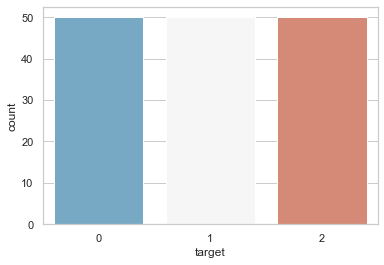

In [7]:
sns.set_style('whitegrid')
sns.countplot(x=iris_data['target'],data=iris_data,palette='RdBu_r')

*Dapat dilihat dari plot diatas bahwa data tidak imbalance.*

**Pemeriksaan sebaran nilai data pada tiap atribut/variabel untuk masing-masing kelas dengan box-plot**

Dengan melihat apakah ada perbedaan sebaran nilai yang mencolok, kita bisa mendapatkan gambaran, atribut/variabel manakah yang secara umum kita duga bisa menjadi pembeda utama antara 3 kelas.

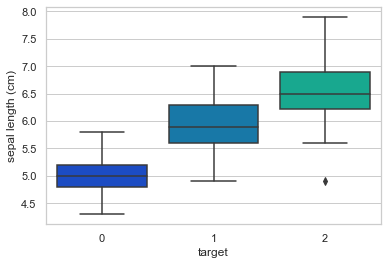

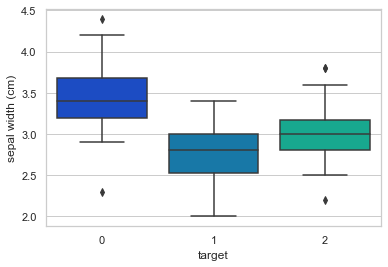

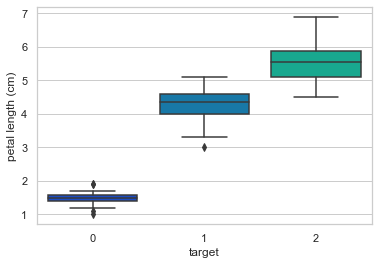

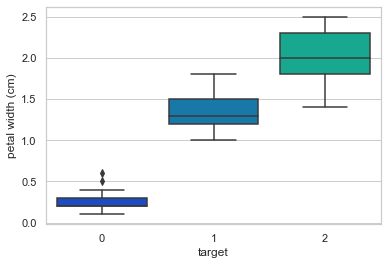

<Figure size 432x288 with 0 Axes>

In [8]:
l=list(iris_data.columns[0:5])
for i in range(len(l)-1):
    sns.boxplot(x='target',y=l[i], data=iris_data, palette='winter')
    plt.figure()

*Dapat dilihat dari boxplot tiap kelas dengan masing-masing variabel dari data iris yang digunakan, tiap kelas memiliki ciri khas masing-masing salah satunya seperti kelas 0 yang memiliki lebar sepal paling lebar dibandingkan kelas lainnya, panjang sepal paling pendek, panjang petal paling pendek dan lebar petal paling pendek juga.*

**Pengecekan korelasi antar variabel yang digunakan**

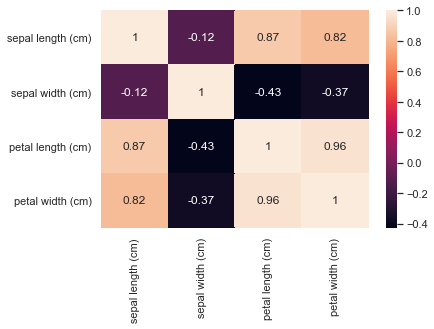

In [9]:
iris_data = iris_data.drop('target',axis=1) 
#iris_data = iris_data.drop('petal length (cm)',axis=1) 
#iris_data = iris_data.drop('petal width (cm)',axis=1) 
ax = sns.heatmap(iris_data.corr(), annot=True)

**Split Data**

In [10]:
X, y = (iris_data, iris.target)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  112  | Jumlah Test Data :  38


**Make Model**

In [11]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

**Predict Test Data**

In [12]:
y_pred = clf.predict(X_test)
print(pd.DataFrame({'Prediction Label' : iris.target_names[y_pred],
              'Actual Label': iris.target_names[y_test]}))

   Prediction Label Actual Label
0         virginica    virginica
1        versicolor   versicolor
2            setosa       setosa
3         virginica    virginica
4            setosa       setosa
5         virginica    virginica
6            setosa       setosa
7        versicolor   versicolor
8        versicolor   versicolor
9        versicolor   versicolor
10        virginica    virginica
11       versicolor   versicolor
12       versicolor   versicolor
13       versicolor   versicolor
14       versicolor   versicolor
15           setosa       setosa
16       versicolor   versicolor
17       versicolor   versicolor
18           setosa       setosa
19           setosa       setosa
20        virginica    virginica
21       versicolor   versicolor
22           setosa       setosa
23           setosa       setosa
24        virginica    virginica
25           setosa       setosa
26           setosa       setosa
27       versicolor   versicolor
28       versicolor   versicolor
29        

**Menerapkan 2-10 Fold Cross Validation & check accuracy**

In [13]:
print('Accuracy without cross validation: ',clf.score(X_train, y_train))
for i in range(2,11):
  scores = cross_val_score(clf, X_train, y_train, cv=i, scoring="accuracy")
  print('Accuracy After Cross Validation {} Fold: '.format(i), scores.mean())


Accuracy without cross validation:  0.9464285714285714
Accuracy After Cross Validation 2 Fold:  0.9553571428571428
Accuracy After Cross Validation 3 Fold:  0.9466571834992887
Accuracy After Cross Validation 4 Fold:  0.9464285714285714
Accuracy After Cross Validation 5 Fold:  0.9557312252964426
Accuracy After Cross Validation 6 Fold:  0.9463937621832358
Accuracy After Cross Validation 7 Fold:  0.9464285714285714
Accuracy After Cross Validation 8 Fold:  0.9464285714285714
Accuracy After Cross Validation 9 Fold:  0.9472934472934473
Accuracy After Cross Validation 10 Fold:  0.9378787878787878


*Dapat dilihat bahwa dengan melakukan 5 fold cross validation menghasilkan nilai accuracy yang lebih baik sebesar 95,57 % dibandingkan tanpa cross validation maupun dengan banyak fold yang lainnya.*

**Confusion Matrix**

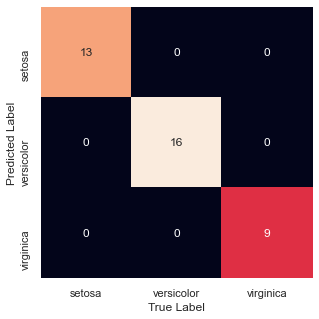

In [14]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=iris.target_names, 
           yticklabels=iris.target_names)

plt.xlabel('True Label')
plt.ylabel('Predicted Label');

**Predict New Data**

Misalnya kita memiliki bunga dengan sepal_length = 2.6, sepal_width = 1.1, petal_length = 2.8, dan petal_width = 2.2

In [15]:
predict = clf.predict([[2.6,1.1,2.8,2.2]])
iris.target_names[predict][0]

'versicolor'